In [1]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156, criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1) 
#min_samples_split : 나누기 위한 최소 샘플의 개수
#min_samples_leaf : 나눴을 때 최소 샘플의 개수
iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state = 11)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=4, random_state=156)

In [30]:
from sklearn.tree import export_graphviz

In [31]:
export_graphviz(dt_clf,out_file='tree.dot',feature_names=iris.feature_names,class_names= iris.target_names)

In [32]:
import graphviz

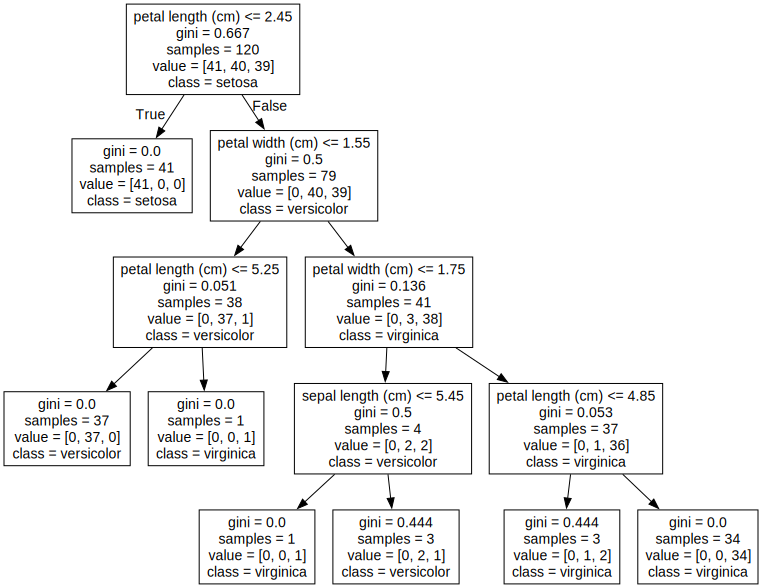

In [33]:
with open('tree.dot')as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [36]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace = True)
    df['Embarked'].fillna('N',inplace = True)
    df['Fare'].fillna(0,inplace = True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId','Name','Ticket'],inplace = True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin']=df.Cabin.str[0]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [51]:
import pandas as pd

titanic= pd.read_csv('titanic_train.csv')
y = titanic.Survived
x = titanic.drop(columns=['Survived'])
x = transform_features(x)

dt_clf = DecisionTreeClassifier(random_state=156, criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1) 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 11)
dt_clf.fit(X_train,y_train)


['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


DecisionTreeClassifier(random_state=156)

In [53]:
export_graphviz(dt_clf,out_file='titanic.dot',feature_names=x.columns,class_names= ['사망','생존'],filled=True)

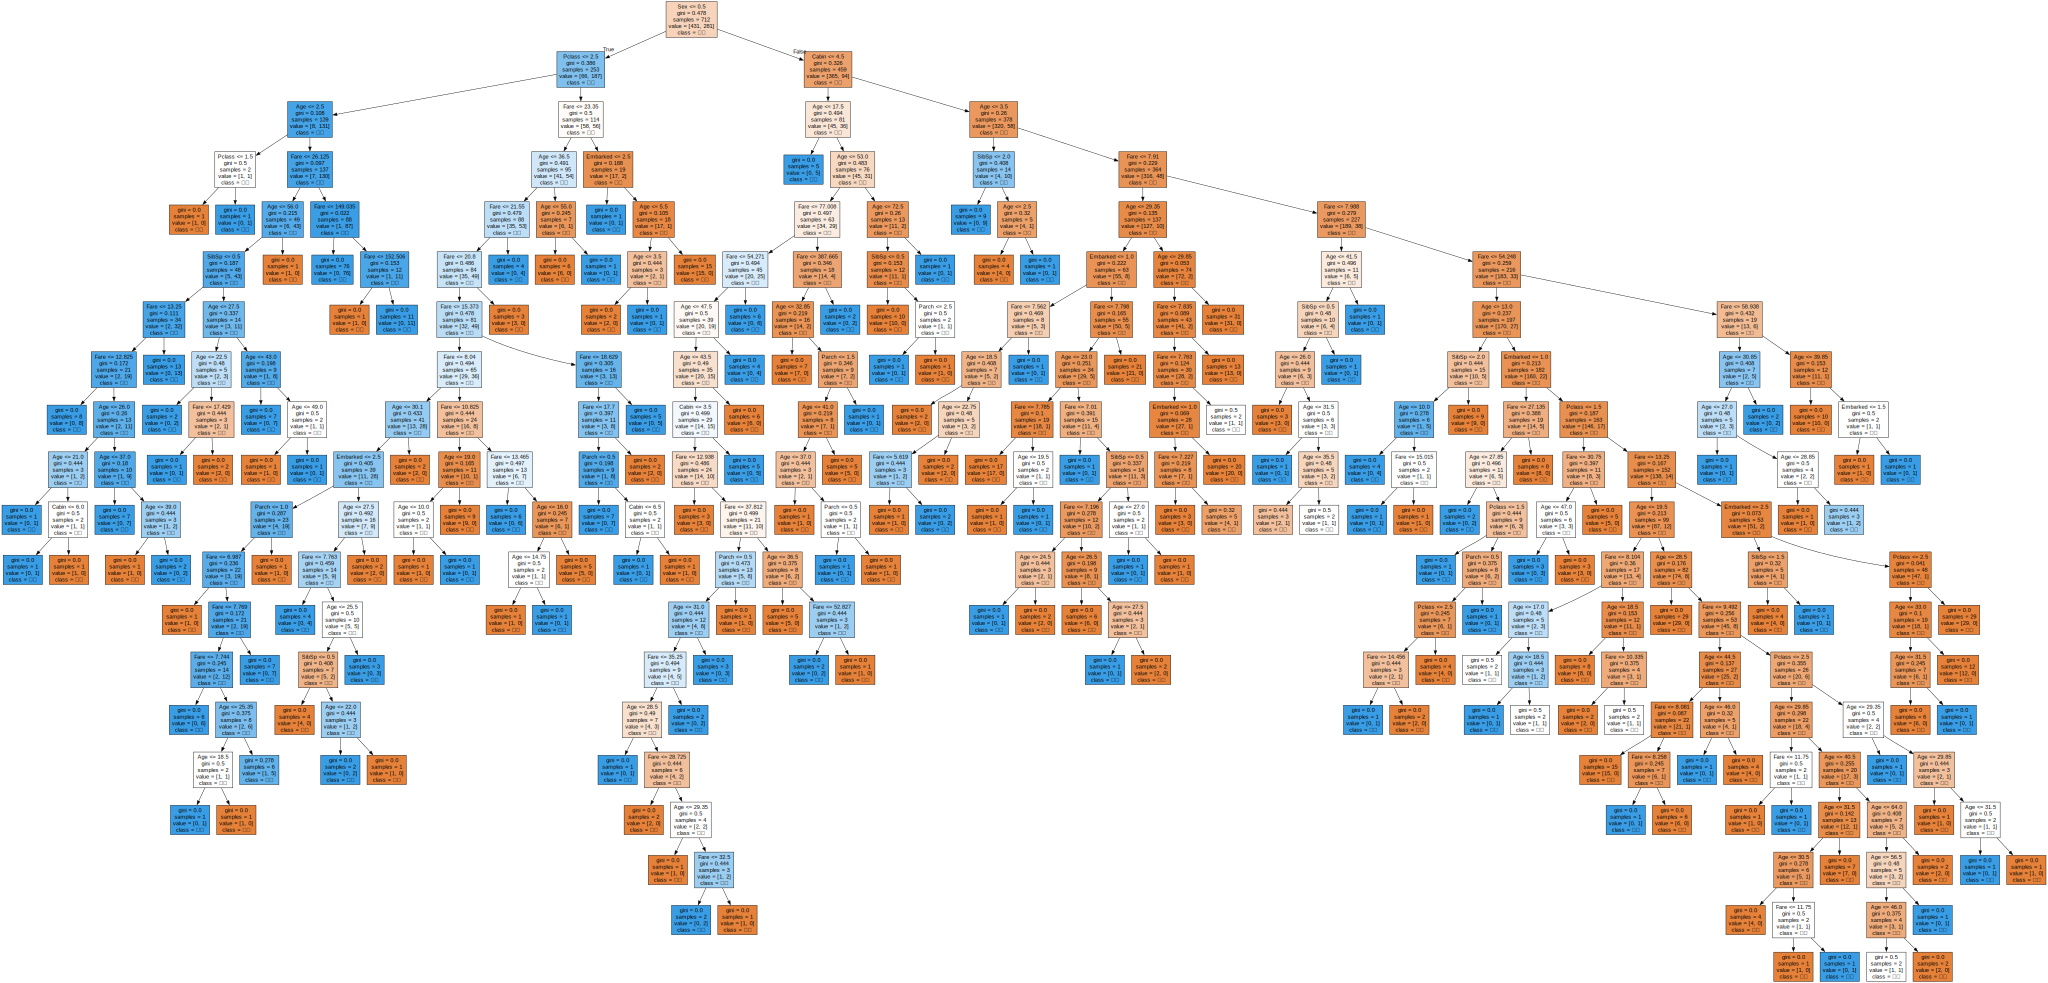

In [54]:
with open('titanic.dot',encoding='utf8') as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)
graph

In [ ]:
graph.render(filename='titanic.img',format='png')